<br><br><center><h1 style="font-size:40px;color:#20B2AA">Classifying Fruits </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://www.worldatlas.com/r/w728-h425-c728x425/upload/46/cb/e1/shutterstock-252338818.jpg" align="middle" style="width:650px;height:360px;"/></td>
<td>
    <p align="justify" style="font-size:16px;color:#2F4F4F;">
Many things we call vegetables are fruits. Many things we call berries are not berries at all. Nuts and grains are fruits as well, but not all the things we call nuts are true nuts!
        <br>
The scientific definition of a fruit is any structure that develops from a fertilized ovary and contains seeds of the plant. All fruits come from the ovaries of a flower. Therefore, many things that we consider to be “vegetables” are actually fruits.
        <br>
        For example tomatoes, cucumbers, beans (green beans as well as all other beans), peas, peppers, corn, eggplant and squash are all fruits.
        <br>
        Fruits can be fleshy like tomatoes or peaches, or they can be dry like coconuts or peanuts. They can have many seeds in them like tomatoes, papaya and watermelon, or they can have one single seed in them like avocados, almonds and cherries. They can be very large, like jackfruit, pineapples and pumpkins, or very small, like blueberries, raspberries and grapes. 
        <br>
        Dataset: <a href="https://www.kaggle.com/moltean/fruits">Kaggle</a>.

    </p>
</td>
</tr>
</table>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import keras
import numpy as np 
from keras.datasets.cifar10 import load_data
import glob
import os
import keras 
import cv2
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import keras
import random
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

# Training set

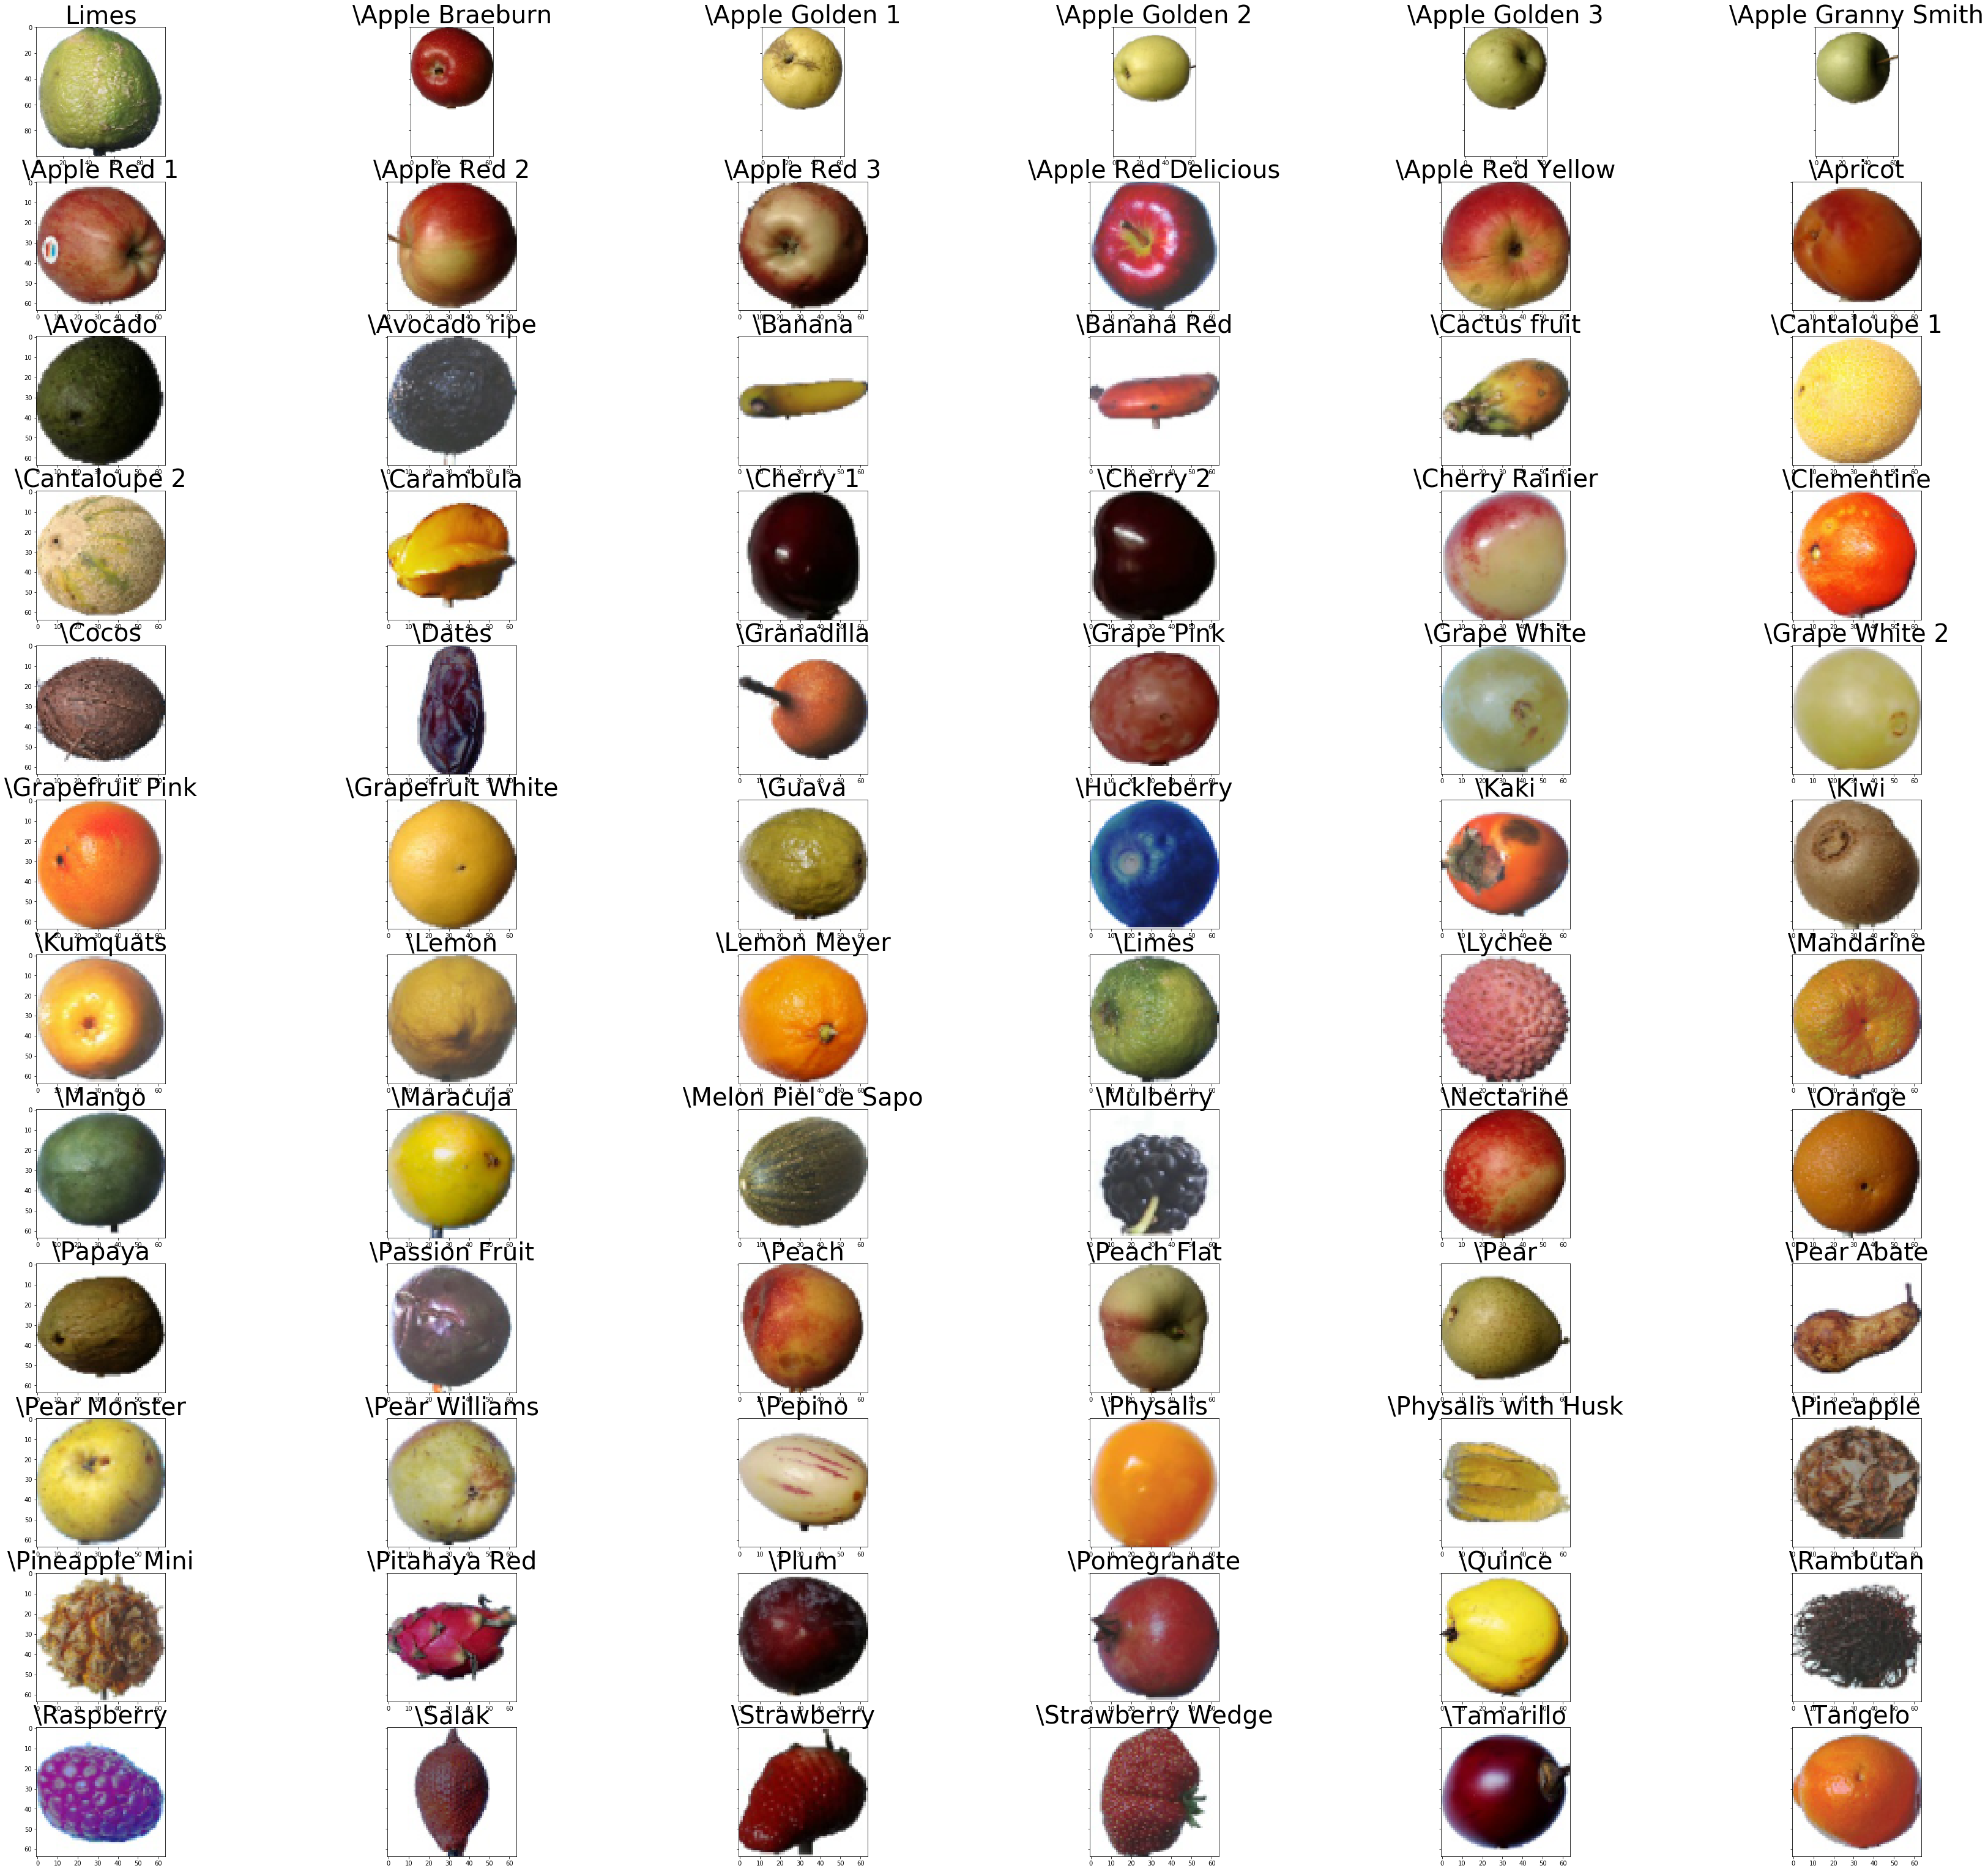

In [3]:
fruit_images = []
labels = []
fig, axs = plt.subplots(12,6, figsize=(60, 55), sharey='row')
image1 = cv2.imread("F:/data/fruits-360/Training/Limes/0_100.jpg",cv2.IMREAD_COLOR) # cv2.imread() to read an image
image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2BGR) # conver RGB to BGR 
i=0
axs = axs.ravel()
for fruit_dir_path in glob.glob("F:/data/fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/") #['F:', 'data', 'fruits-360', 'Training\\Apple Braeburn']
    fruit_label = fruit_label[3]
    axs[0].imshow(image1)
    axs[0].set_title(str("Limes"),fontsize=40)
    i+=1
    for image_path in glob.glob(os.path.join(fruit_dir_path,"*.jpg")): #['F:/data/fruits-360/Training\\Apple Braeburn\\0_100.jpg','F:/data/fruits-360/Training\\Apple Braeburn\\100_100.jpg'
        image = cv2.imread(image_path,cv2.IMREAD_COLOR) # cv2.imread() to read an image
        image = cv2.resize(image,(64,64)) # Loads a color image
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # conver RGB to BGR 
        fruit_images.append(image)
        labels.append(fruit_label)
    axs[i].imshow(image)
    axs[i].set_title(str(fruit_label).replace("Training", ""),fontsize=40)
plt.show()
fruit_images_ARR = np.array(fruit_images)
labels_ARR = np.array(labels)

In [4]:
label_id_Dict = {key:value for value,key in enumerate(np.unique(labels_ARR))} #add index 0,1,2... to be keys of the values
id_label_Dict = {key:value for value,key in label_id_Dict.items()}

In [5]:
label_ids = np.array([label_id_Dict[x] for x in labels_ARR])

# Testing set

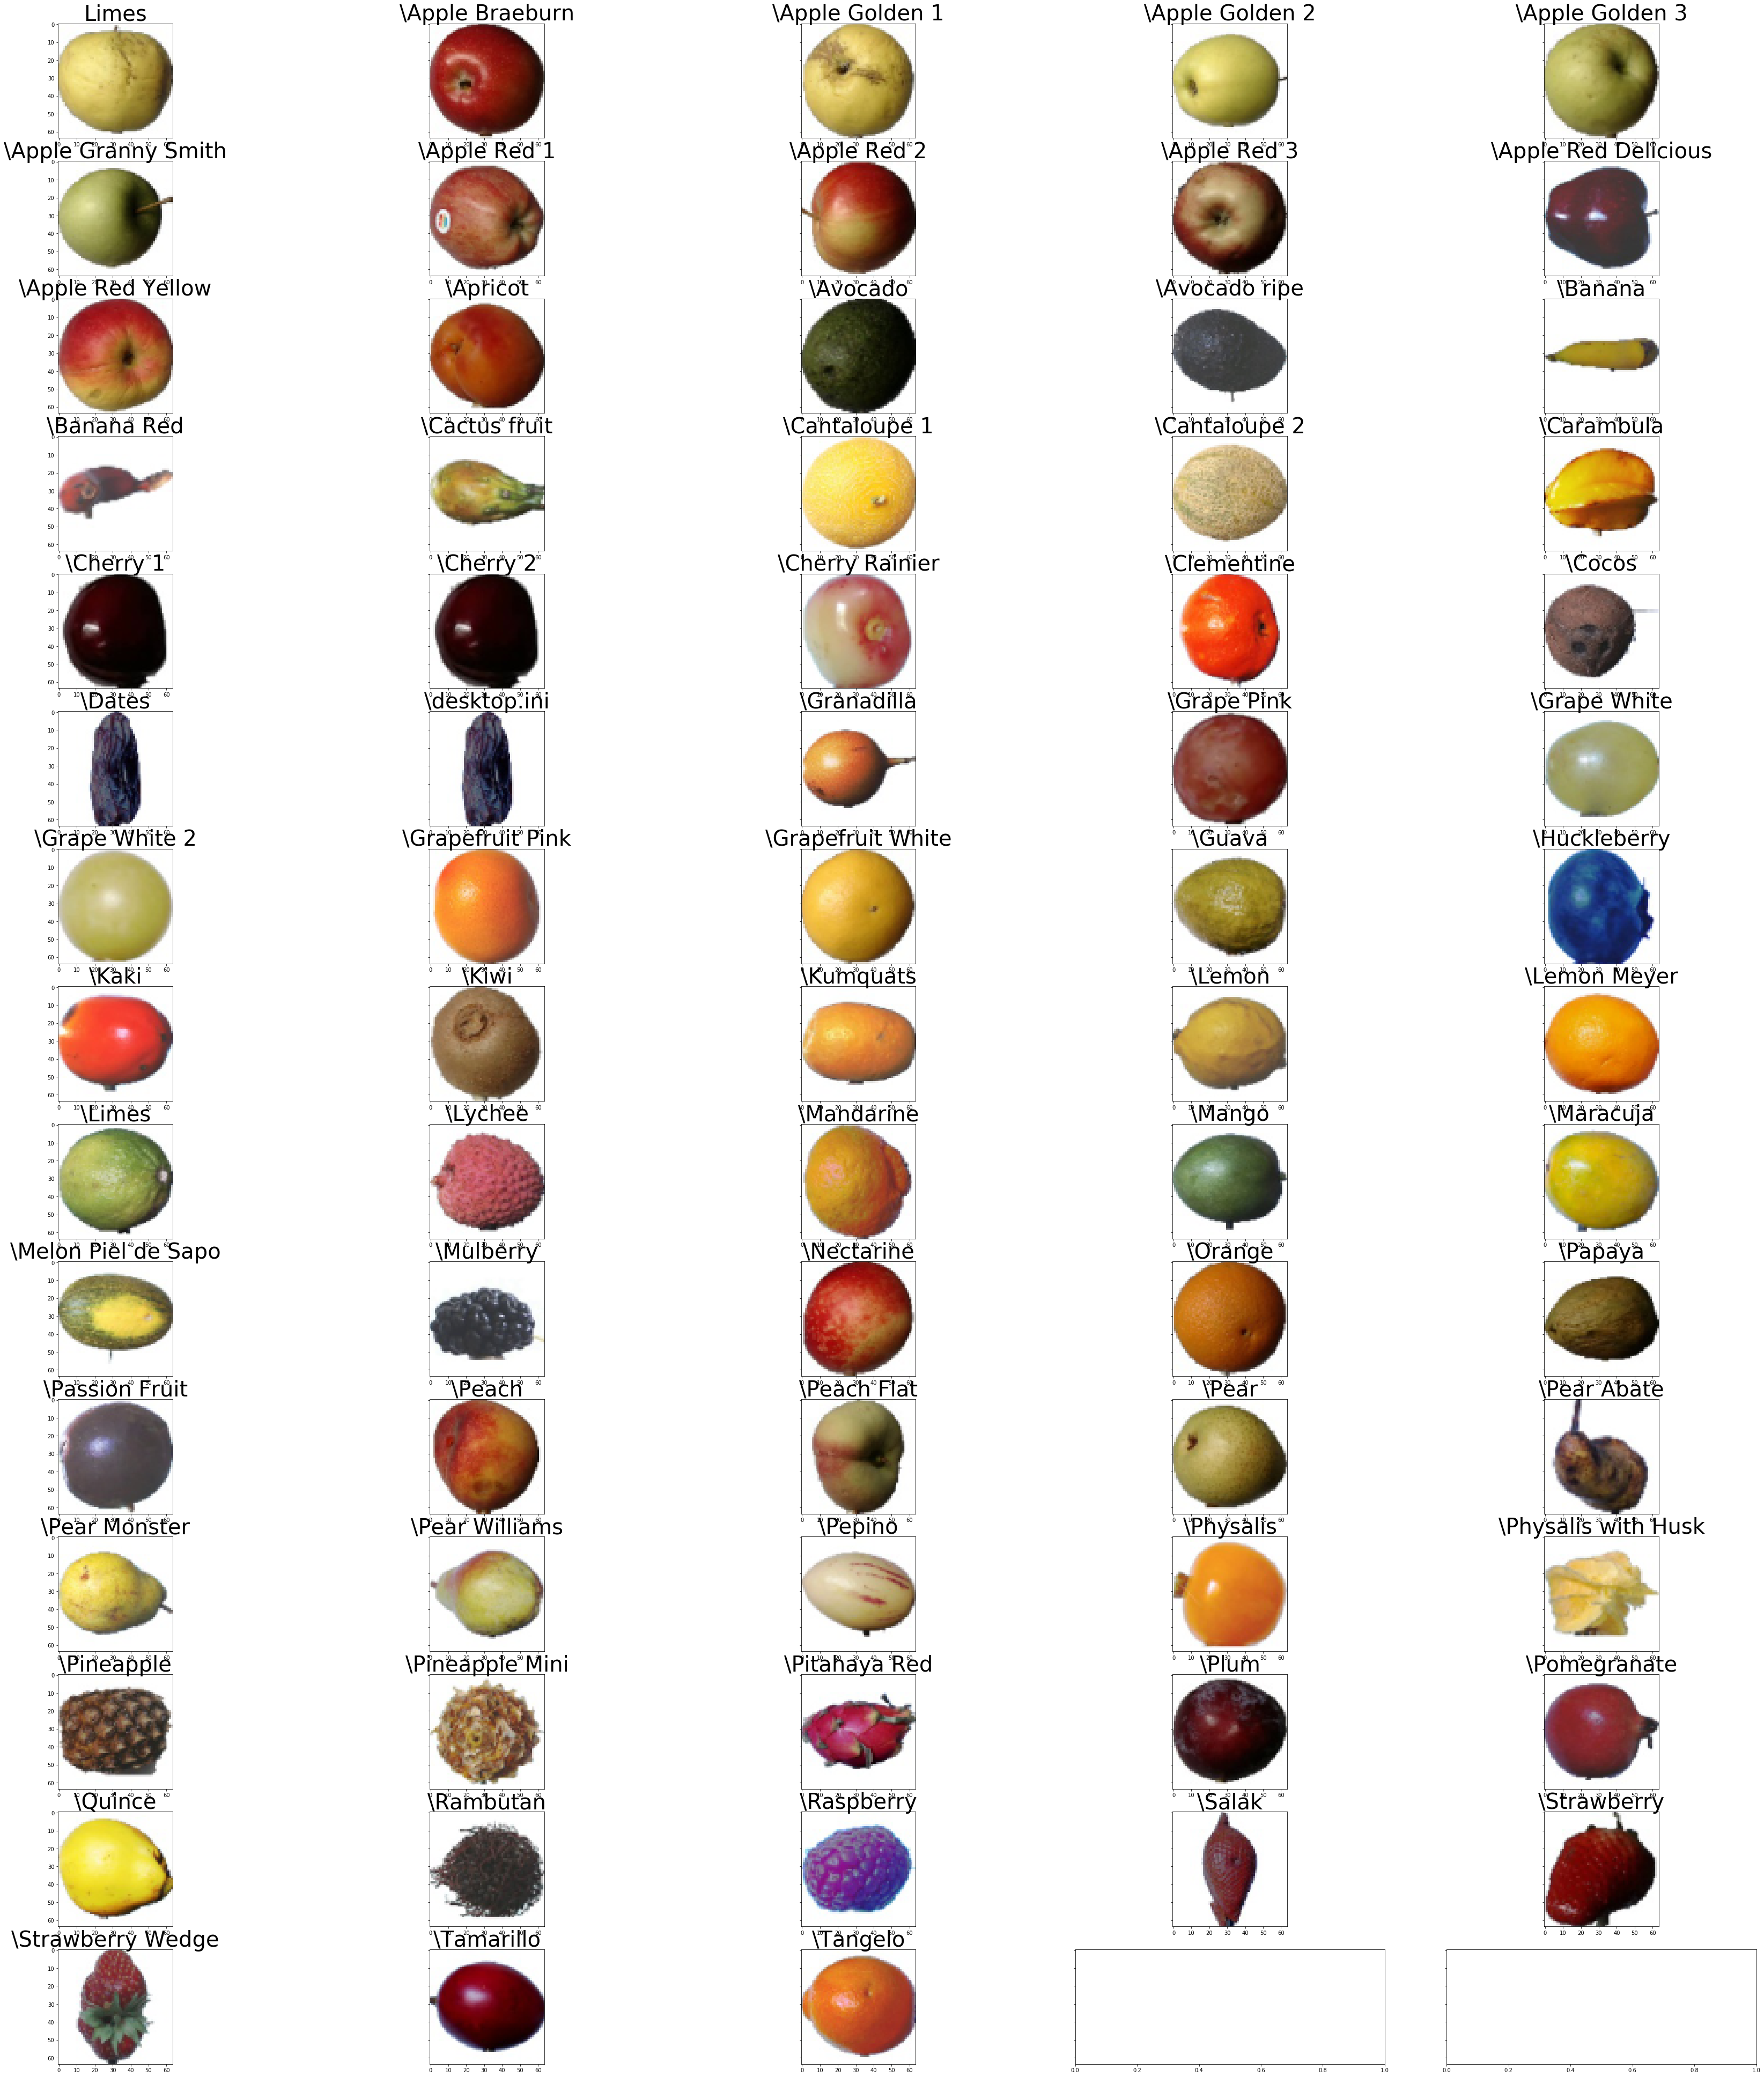

In [6]:
validation_fruit_images = []
validation_labels = [] 
fig, axs = plt.subplots(15,5, figsize=(60, 70), sharey='row')
image1 = cv2.imread("F:/data/fruits-360/Test/Apple Golden 1/5_100.jpg",cv2.IMREAD_COLOR) # cv2.imread() to read an image
image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2BGR) # conver RGB to BGR 
image1 = cv2.resize(image1,(64,64)) # Loads a color image
i=0
axs = axs.ravel()
axs[0].imshow(image1)
axs[0].set_title(str("Limes"),fontsize=40)
for fruit_dir_path in glob.glob("F:/data/fruits-360/Test/*"):
    fruit_label = fruit_dir_path.split("/") #['F:', 'data', 'fruits-360', 'Training\\Apple Braeburn']
    fruit_label = fruit_label[3]
    i+=1
    for image_path in glob.glob(os.path.join(fruit_dir_path,"*.jpg")): #['F:/data/fruits-360/Training\\Apple Braeburn\\0_100.jpg','F:/data/fruits-360/Training\\Apple Braeburn\\100_100.jpg'
        image = cv2.imread(image_path,cv2.IMREAD_COLOR) # cv2.imread() to read an image
        image = cv2.resize(image,(64,64)) # Loads a color image
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # conver RGB to BGR 
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
    axs[i].imshow(image)
    axs[i].set_title(str(fruit_label).replace("Test", ""),fontsize=40)
plt.show()

validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [7]:
label_id_Dict1 = {key:value for value,key in enumerate(np.unique(validation_labels))} #add index 0,1,2... to be keys of the values
id_label_Dict1 = {key:value for value,key in label_id_Dict1.items()}

In [8]:
validation_label_ids = np.array([label_id_Dict1[x] for x in validation_labels])

# Class imbalanced? 

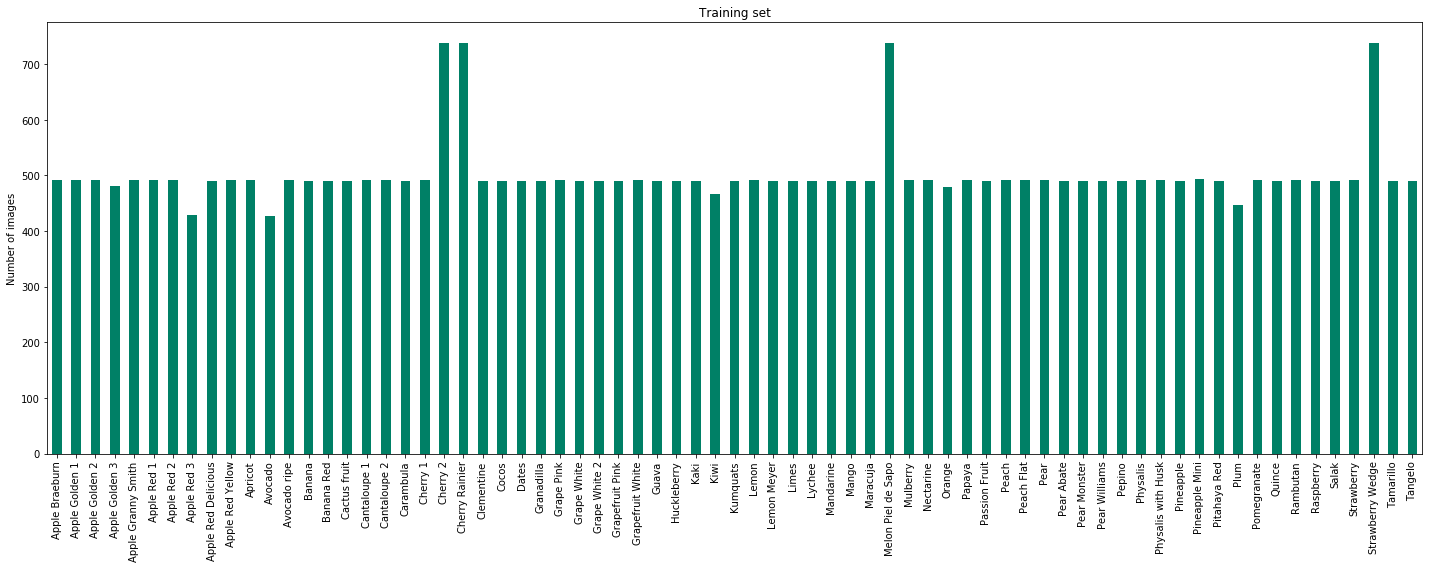

In [10]:
f_names = [k for k in os.listdir('F:/data/fruits-360/Training/')] # list of fruit names
# initializing empty dictionaries to contain number of fruits
count_train = {}
count_total = {}
# looping over the list of fruit names
for k in f_names:
    # storing the number of images in each class to different folders
    count_train[k] = len(os.listdir(os.path.join('F:/data/fruits-360/Training/',k)))
# Assigning the number of fruits in different sets to one dictionary
count_total['Training'] = count_train
# Storing the dictionary to a data frame, df
df = pd.DataFrame.from_dict(count_total)
# making the bar plot
df['Training'].plot(kind='bar', figsize=(20, 8), legend=False, colormap= "summer")
# labeling the axis and setting a title
plt.ylabel('Number of images')
plt.title('Training set')
plt.tight_layout()

In [11]:
df[df.Training>700]

,Training
Cherry 2,738
Cherry Rainier,738
Melon Piel de Sapo,738
Strawberry Wedge,738


In [12]:
df.Training.mean()

501.76056338028167

In [10]:
def del_randomly_images(your_path):
    images=[]
    for i in os.listdir(your_path):
        images.append(i)
    for counter,image in enumerate(images):
        for i in random.sample(range(738), 245):
            if counter==i:
                os.remove(your_path+str(image))
    print("Done!")

In [11]:
del_randomly_images("F:/data/fruits-360/Training/Cherry 2/")
del_randomly_images("F:/data/fruits-360/Training/Cherry Rainier/")
del_randomly_images("F:/data/fruits-360/Training/Melon Piel de Sapo/")
del_randomly_images("F:/data/fruits-360/Training/Strawberry Wedge/")

Done!
Done!
Done!
Done!


# Augmentation

## Rotation
![](https://docs.opencv.org/3.0-beta/_images/rotation.jpg)
## Affine
![](https://docs.opencv.org/3.0-beta/_images/affine.jpg)

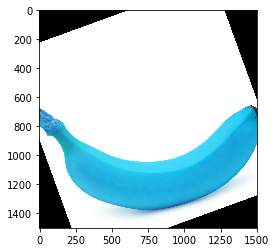

In [20]:
img = cv2.imread("F:/data/fruits-360/test-multiple_fruits/chuoi.jpg")
rows,cols,ch = img.shape
#rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),20,1)
#Affine
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
plt.show()

In [11]:
df[df.Training < 460]

,Training
Apple Red 3,429
Avocado,427
Plum,447


In [8]:
def generate_randomly_images(_yourpath,_range,_num):
    images=[]
    for i in os.listdir(_yourpath):
        images.append(i)
    for counter,image in enumerate(images):
        for i in random.sample(range(_range), _num):
            if counter==i:
                img= cv2.imread(_yourpath+"/"+str(image))
                rows,cols,ch = img.shape
                M = cv2.getRotationMatrix2D((cols/2,rows/2),20,1)
                dst = cv2.warpAffine(img,M,(cols,rows))
                cv2.imwrite("Orange_"+str(counter)+"_new.jpg",dst)

In [69]:
generate_randomly_images("F:/data/fruits-360/Training/Orange",479,31)

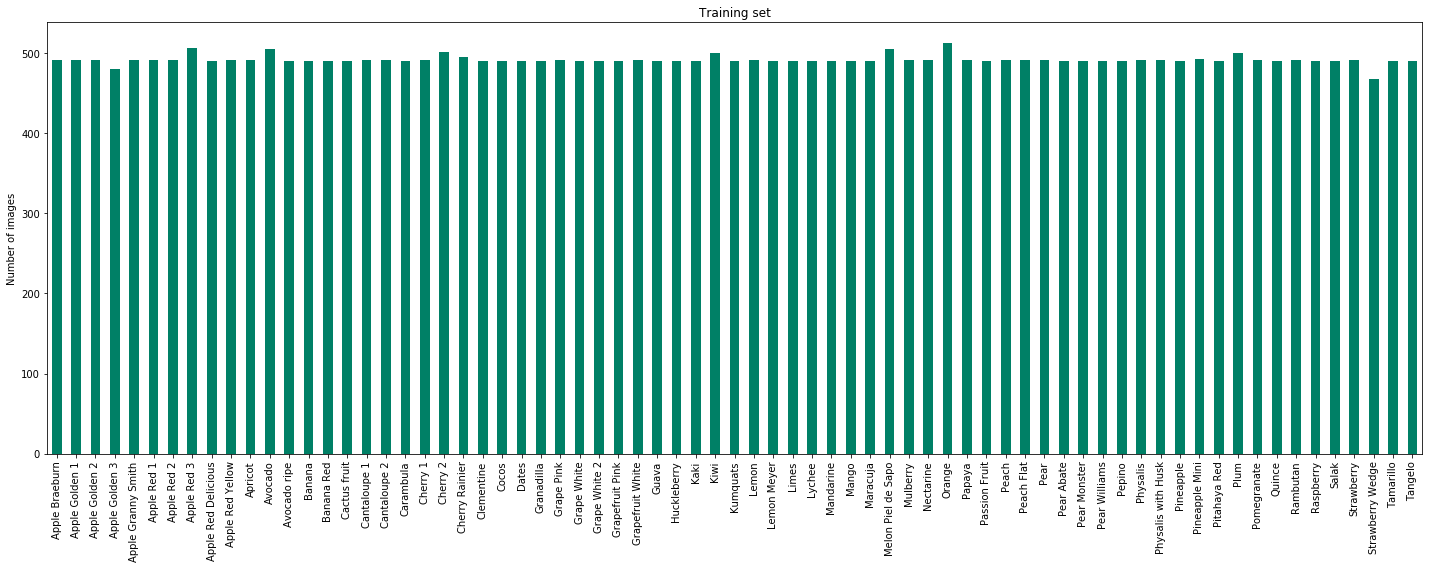

In [12]:
f_names = [k for k in os.listdir('F:/data/fruits-360/Training/')] # list of fruit names
# initializing empty dictionaries to contain number of fruits
count_train = {}
count_total = {}
# looping over the list of fruit names
for k in f_names:
    # storing the number of images in each class to different folders
    count_train[k] = len(os.listdir(os.path.join('F:/data/fruits-360/Training/',k)))
# Assigning the number of fruits in different sets to one dictionary
count_total['Training'] = count_train
# Storing the dictionary to a data frame, df
df = pd.DataFrame.from_dict(count_total)
# making the bar plot
df['Training'].plot(kind='bar', figsize=(20, 8), legend=False, colormap= "summer")
# labeling the axis and setting a title
plt.ylabel('Number of images')
plt.title('Training set')
plt.tight_layout()

# Splitting the Data

In [9]:
X_train, X_test = fruit_images_ARR, validation_fruit_images
y_train, y_test = label_ids, validation_label_ids

# Normalize color values to between 0 and 1

In [10]:
X_train = X_train/255
X_test = X_test/255

# One Hot Encode the Output 

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Shape 

In [12]:
print("training shape: {}{}".format(X_train.shape,y_train.shape))
print("testing shape : {}{}".format(X_test.shape,y_test.shape))

training shape: (34922, 64, 64, 3)(34922, 71)
testing shape : (11968, 64, 64, 3)(11968, 71)


In [13]:
y_test.shape

(11968, 71)

# Setting Up Our Neural Network


##  Summarize the construction of deep learning models in Keras
* 1. Define your model. Create a Sequential model and add configured layers.
* 2. Compile your model. Specify loss function and optimizers and call the compile() function on the model.
* 3. Fit your model. Train the model on a sample of data by calling the fit() function on the model.
* 4. Make predictions. Use the model to generate predictions on new data by calling functions such as evaluate() or predict() on the model.

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Activation,SeparableConv2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD, Adamax, Adam
from keras.models import model_from_yaml
from sklearn.metrics import classification_report

# Import the backend
from keras import backend as K
from keras.callbacks import TensorBoard,EarlyStopping,ModelCheckpoint
from keras.layers.advanced_activations import LeakyReLU
from time import time
import h5py

In [17]:
import tensorflow as tf
print('keras version:' + keras.__version__)
print('Tensorflow version:' + tf.__version__)

keras version:2.1.6
Tensorflow version:1.8.0


In [18]:
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(71, activation='softmax'))
model.summary()
tbCallBack1 = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))
tbCallBack1.set_model(model)
# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [19]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34922 samples, validate on 11968 samples
Epoch 1/5
34922/34922 [==============================] - 1810s 52ms/step - loss: 1.7643 - acc: 0.5325 - val_loss: 0.5428 - val_acc: 0.8629
Epoch 2/5
34922/34922 [==============================] - 2150s 62ms/step - loss: 0.2479 - acc: 0.9279 - val_loss: 0.5299 - val_acc: 0.8575
Epoch 3/5
34922/34922 [==============================] - 2267s 65ms/step - loss: 0.1245 - acc: 0.9652 - val_loss: 0.3401 - val_acc: 0.9209
Epoch 4/5
34922/34922 [==============================] - 2174s 62ms/step - loss: 0.0961 - acc: 0.9749 - val_loss: 0.3774 - val_acc: 0.9174
Epoch 5/5
34922/34922 [==============================] - 1866s 53ms/step - loss: 0.0690 - acc: 0.9820 - val_loss: 0.2936 - val_acc: 0.9311
Test loss: 0.29362821413817547
Test accuracy: 0.9311497326203209


In [20]:
target_names = []
[target_names.append(i) for i in label_id_Dict.keys()]
target_names_cleaned = [j.replace("Training\\", "") for j in target_names]
print(len(target_names_cleaned))
target_names_cleaned[0]

71


'Apple Braeburn'

In [21]:
Y_pred = np.argmax(model.predict(X_test, batch_size = 128), axis=1)
print(classification_report(validation_label_ids,Y_pred,target_names=target_names_cleaned))

                     precision    recall  f1-score   support

     Apple Braeburn       0.94      0.66      0.77       164
     Apple Golden 1       0.85      0.86      0.86       164
     Apple Golden 2       0.88      0.84      0.86       164
     Apple Golden 3       0.59      0.94      0.72       161
 Apple Granny Smith       0.93      0.82      0.87       164
        Apple Red 1       0.79      0.67      0.73       164
        Apple Red 2       0.88      0.83      0.86       164
        Apple Red 3       0.72      0.51      0.60       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       1.00      1.00      1.00       164
            Apricot       0.95      1.00      0.97       164
            Avocado       0.97      1.00      0.98       143
       Avocado ripe       1.00      1.00      1.00       166
             Banana       0.84      0.74      0.79       166
         Banana Red       1.00      0.84      0.92       166
       Cactus fruit    

In [36]:
def predict_given_image(image_to_predict):
    image_to_predict = cv2.imread(image_to_predict,cv2.IMREAD_COLOR) # cv2.imread() to read an image
    image_to_predict = cv2.cvtColor(image_to_predict, cv2.COLOR_RGB2BGR)
    plt.imshow(image_to_predict)
    plt.show()
    image_to_predict = cv2.resize(image_to_predict, (64,64))
    print("The dimension: ",image_to_predict.shape)
    image_to_predict = image_to_predict.reshape(1,64, 64, 3)
    image_to_predict = np.array(image_to_predict)
    image_to_predict = image_to_predict/255
    predicted_image = model.predict_classes(image_to_predict)
    print(type(predicted_image),predicted_image)
    return predicted_image,target_names_cleaned[predicted_image[0]]

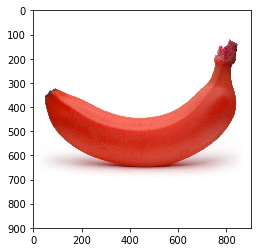

The dimension:  (64, 64, 3)
<class 'numpy.ndarray'> [14]


(array([14], dtype=int64), 'Banana Red')

In [39]:
predict_given_image("F:/data/fruits-360/test-multiple_fruits/banana_red2.jpg")

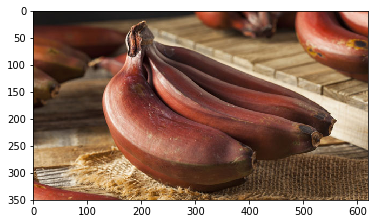

The dimension:  (64, 64, 3)
<class 'numpy.ndarray'> [14]


(array([14], dtype=int64), 'Banana Red')

In [40]:
predict_given_image("F:/data/fruits-360/test-multiple_fruits/red-banana-1.jpg")

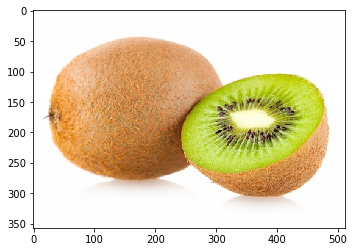

The dimension:  (64, 64, 3)
<class 'numpy.ndarray'> [57]


(array([57], dtype=int64), 'Physalis with Husk')

In [42]:
predict_given_image("F:/data/fruits-360/test-multiple_fruits/kiwi.png")

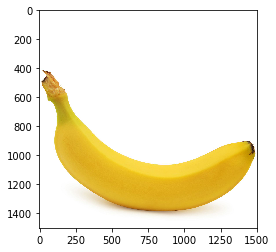

The dimension:  (64, 64, 3)
<class 'numpy.ndarray'> [55]


(array([55], dtype=int64), 'Pepino')

In [41]:
predict_given_image("F:/data/fruits-360/test-multiple_fruits/chuoi.jpg")